In [ ]:
pip install statsmodels

In [ ]:
pip install pandas_datareader

In [ ]:
pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 892.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
pip install yfinance

In [ ]:
pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.1 MB/s eta 0:00:00


In [ ]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")


In [ ]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [ ]:
sp500['Symbol']=sp500['Symbol'].str.replace('.','-')

In [ ]:
symbols_list=sp500['Symbol'].unique().tolist()

In [ ]:
end_date='2023-09-27'
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)


In [ ]:
df=yf.download(tickers=symbols_list,
               start=start_date,
               end=end_date).stack()
df

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
5 Failed downloads:
ERROR:yfinance:['VLTO', 'AMTM', 'SW', 'SOLV', 'GEV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-09-29 00:00:00 -> 2023-09-27) (Yahoo error = "Data doesn\'t exist for startDate = 1443499200, endDate = 1695787200")')


Price                              Adj Close       Close        High  \
Date                      Ticker                                       
2015-09-29 00:00:00+00:00 A        31.375294   33.740002   34.060001   
                          AAPL     24.622631   27.264999   28.377501   
                          ABBV     35.718922   52.790001   54.189999   
                          ABT      33.145809   39.500000   40.150002   
                          ACGL     24.416668   24.416668   24.456667   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.501106   89.519997   90.849998   
                          YUM     121.604256  124.010002  124.739998   
                          ZBH     111.287468  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     175.131119  176.869995  178.449997   

Price                                    Low        Open       Volume  
Date                      Ticker                                       
2015-09-29 00:00:00+00:00 A        33.240002   33.360001    2252400.0  
                          AAPL     26.965000   28.207500  293461600.0  
                          ABBV     51.880001   53.099998   12842800.0  
                          ABT      39.029999   39.259998   12287500.0  
                          ACGL     24.100000   24.170000    1888800.0  
...                                      ...         ...          ...  
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0  
                          YUM     123.449997  124.239998    1500600.0  
                          ZBH     112.419998  116.769997    3610500.0  
                          ZBRA    222.580002  225.970001     355400.0  
                          ZTS     176.270004  176.580002    1463200.0  

[982460 rows x 6 columns]

In [ ]:
df.index.names=['date','ticker']
df.columns=df.columns.str.lower()
df


Price                              adj close       close        high  \
date                      ticker                                       
2015-09-29 00:00:00+00:00 A        31.375294   33.740002   34.060001   
                          AAPL     24.622631   27.264999   28.377501   
                          ABBV     35.718922   52.790001   54.189999   
                          ABT      33.145809   39.500000   40.150002   
                          ACGL     24.416668   24.416668   24.456667   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.501106   89.519997   90.849998   
                          YUM     121.604256  124.010002  124.739998   
                          ZBH     111.287468  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     175.131119  176.869995  178.449997   

Price                                    low        open       volume  
date                      ticker                                       
2015-09-29 00:00:00+00:00 A        33.240002   33.360001    2252400.0  
                          AAPL     26.965000   28.207500  293461600.0  
                          ABBV     51.880001   53.099998   12842800.0  
                          ABT      39.029999   39.259998   12287500.0  
                          ACGL     24.100000   24.170000    1888800.0  
...                                      ...         ...          ...  
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0  
                          YUM     123.449997  124.239998    1500600.0  
                          ZBH     112.419998  116.769997    3610500.0  
                          ZBRA    222.580002  225.970001     355400.0  
                          ZTS     176.270004  176.580002    1463200.0  

[982460 rows x 6 columns]

In [ ]:
df.columns

Index(['adj close', 'close', 'high', 'low', 'open', 'volume'], dtype='object', name='Price')

In [ ]:
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame with 'close' column and 'date', 'ticker' index

# Example: Plotting closing price for a specific stock (replace 'AAPL' with your desired ticker)
ticker_to_plot = 'AAPL'
df_ticker = df[df.index.get_level_values('ticker') == ticker_to_plot]

fig = go.Figure(data=[go.Candlestick(x=df_ticker.index.get_level_values('date'),
                open=df_ticker['open'],
                high=df_ticker['high'],
                low=df_ticker['low'],
                close=df_ticker['close'])])

fig.update_layout(title=f'Closing Price of {ticker_to_plot} Stock',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

In [ ]:
df_organised=df.stack()
df_organised

date                       ticker  Price    
2015-09-29 00:00:00+00:00  A       adj close    3.137528e+01
                                   close        3.374000e+01
                                   high         3.406000e+01
                                   low          3.324000e+01
                                   open         3.336000e+01
                                                    ...     
2023-09-26 00:00:00+00:00  ZTS     close        1.768700e+02
                                   high         1.784500e+02
                                   low          1.762700e+02
                                   open         1.765800e+02
                                   volume       1.463200e+06
Length: 5894760, dtype: float64

In [ ]:
df_organised.index.names=['date','ticker']


ValueError: Length of names must match number of levels in MultiIndex.

In [ ]:
df_organised

date                       ticker  Price    
2015-09-29 00:00:00+00:00  A       adj close    3.137528e+01
                                   close        3.374000e+01
                                   high         3.406000e+01
                                   low          3.324000e+01
                                   open         3.336000e+01
                                                    ...     
2023-09-26 00:00:00+00:00  ZTS     close        1.768700e+02
                                   high         1.784500e+02
                                   low          1.762700e+02
                                   open         1.765800e+02
                                   volume       1.463200e+06
Length: 5894760, dtype: float64

#Calculating features and technical indicators for each stock


1.   Garman-Klass Volatility
2.   RSI
3. Bollinger Bands
4. ATR
5. MACD
6. Dollar Volume


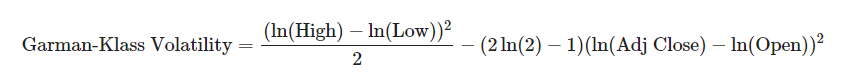

Used to measure the volatility of a given asset

The Garman and Klass estimator for estimating historical volatility assumes Brownian motion with zero drift and no opening jumps (i.e. the opening = close of the previous period). This estimator is 7.4 times more efficient than the close-to-close estimator.

In [ ]:
df_organised['garman_klass_vol']=((np.log(df_organised['High'])-np.log(df_organised['Low']))**2)/2-(2*np.log(2)-1)*(np.log(df_organised['Adj Close'])-np.log(df_organised['Open']))**2

In [ ]:
df_organised

Price                              Adj Close       Close        High  \
date                      Ticker                                       
2015-09-28 00:00:00+00:00 A        31.031214   33.369999   34.270000   
                          AAPL     25.385740   28.110001   28.642500   
                          ABBV     35.806366   52.500000   55.430000   
                          ABT      32.931072   39.060001   40.740002   
                          ACGL     24.180000   24.180000   24.243334   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.501099   89.519997   90.849998   
                          YUM     121.604248  124.010002  124.739998   
                          ZBH     111.287476  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     175.131119  176.869995  178.449997   

Price                                    Low        Open       Volume  \
date                      Ticker                                        
2015-09-28 00:00:00+00:00 A        33.320000   34.130001    2615400.0   
                          AAPL     28.110001   28.462500  208436000.0   
                          ABBV     52.340000   55.389999   15123000.0   
                          ABT      39.000000   40.740002   17219300.0   
                          ACGL     23.966667   24.056667    1946700.0   
...                                      ...         ...          ...   
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0   
                          YUM     123.449997  124.239998    1500600.0   
                          ZBH     112.419998  116.769997    3610500.0   
                          ZBRA    222.580002  225.970001     355400.0   
                          ZTS     176.270004  176.580002    1463200.0   

Price                             garman_klass_vol  
date                      Ticker                    
2015-09-28 00:00:00+00:00 A              -0.003105  
                          AAPL           -0.004879  
                          ABBV           -0.071880  
                          ABT            -0.016539  
                          ACGL            0.000056  
...                                            ...  
2023-09-26 00:00:00+00:00 XYL            -0.000058  
                          YUM            -0.000124  
                          ZBH            -0.000058  
                          ZBRA            0.000133  
                          ZTS             0.000049  

[982934 rows x 7 columns]

[Technical Analysis Library in Python](https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#)

[GitHub Link for pandas_ta,candles](https://github.com/twopirllc/pandas-ta/tree/main/.github)

In [ ]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=eaa4368b8a33f989ced2d69fd421cac4769df95628d8d3ed5830554e828cbc21
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
import pandas_ta

##The Relative Strength Index is popular momentum oscillator used to measure the velocity as well as the magnitude of directional price movements.

In [ ]:
df_organised['rsi']=pandas_ta.rsi(df_organised['Adj Close'])

In [ ]:
df_organised

Price                              Adj Close       Close        High  \
date                      Ticker                                       
2015-09-28 00:00:00+00:00 A        31.031214   33.369999   34.270000   
                          AAPL     25.385740   28.110001   28.642500   
                          ABBV     35.806366   52.500000   55.430000   
                          ABT      32.931072   39.060001   40.740002   
                          ACGL     24.180000   24.180000   24.243334   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.501099   89.519997   90.849998   
                          YUM     121.604248  124.010002  124.739998   
                          ZBH     111.287476  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     175.131119  176.869995  178.449997   

Price                                    Low        Open       Volume  \
date                      Ticker                                        
2015-09-28 00:00:00+00:00 A        33.320000   34.130001    2615400.0   
                          AAPL     28.110001   28.462500  208436000.0   
                          ABBV     52.340000   55.389999   15123000.0   
                          ABT      39.000000   40.740002   17219300.0   
                          ACGL     23.966667   24.056667    1946700.0   
...                                      ...         ...          ...   
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0   
                          YUM     123.449997  124.239998    1500600.0   
                          ZBH     112.419998  116.769997    3610500.0   
                          ZBRA    222.580002  225.970001     355400.0   
                          ZTS     176.270004  176.580002    1463200.0   

Price                             garman_klass_vol        rsi  
date                      Ticker                               
2015-09-28 00:00:00+00:00 A              -0.003105        NaN  
                          AAPL           -0.004879        NaN  
                          ABBV           -0.071880        NaN  
                          ABT            -0.016539        NaN  
                          ACGL            0.000056        NaN  
...                                            ...        ...  
2023-09-26 00:00:00+00:00 XYL            -0.000058  49.015560  
                          YUM            -0.000124  50.298846  
                          ZBH            -0.000058  49.877489  
                          ZBRA            0.000133  54.372937  
                          ZTS             0.000049  52.188409  

[982934 rows x 8 columns]

The Bollinger Bands indicator is a technical analysis tool that helps traders evaluate a stock's volatility and price action. It's made up of three lines: a middle band, which is a moving average, and an upper and lower band. The bands are placed above and below the moving average by a certain number of standard deviations.

Here are some things to know about Bollinger Bands:

Volatility:
The width of the bands indicates the level of volatility, with narrower bands showing less volatility and wider bands showing more.

Price action:
The position of the price relative to the bands can indicate if the price is high or low.

Trading signals:
A price moving closer to the upper band may indicate the asset is overbought, while a price moving closer to the lower band may indicate the asset is oversold.

Confirmation:
Bollinger Bands are best used in conjunction with other indicators to confirm signals.

Customization:
Traders can customize the number of periods in the moving average and the number of standard deviations

In [ ]:
bbands = pandas_ta.bbands(df_organised['Adj Close'])

# Assign Bollinger Bands columns to your DataFrame
df_organised['bb_lower'] = bbands['BBL_5_2.0']
df_organised['bb_middle'] = bbands['BBM_5_2.0']
df_organised['bb_upper'] = bbands['BBU_5_2.0']

In [ ]:
df_organised

Price                              Adj Close       Close        High  \
date                      Ticker                                       
2015-09-28 00:00:00+00:00 A        31.031214   33.369999   34.270000   
                          AAPL     25.385740   28.110001   28.642500   
                          ABBV     35.806366   52.500000   55.430000   
                          ABT      32.931072   39.060001   40.740002   
                          ACGL     24.180000   24.180000   24.243334   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.501099   89.519997   90.849998   
                          YUM     121.604248  124.010002  124.739998   
                          ZBH     111.287476  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     175.131119  176.869995  178.449997   

Price                                    Low        Open       Volume  \
date                      Ticker                                        
2015-09-28 00:00:00+00:00 A        33.320000   34.130001    2615400.0   
                          AAPL     28.110001   28.462500  208436000.0   
                          ABBV     52.340000   55.389999   15123000.0   
                          ABT      39.000000   40.740002   17219300.0   
                          ACGL     23.966667   24.056667    1946700.0   
...                                      ...         ...          ...   
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0   
                          YUM     123.449997  124.239998    1500600.0   
                          ZBH     112.419998  116.769997    3610500.0   
                          ZBRA    222.580002  225.970001     355400.0   
                          ZTS     176.270004  176.580002    1463200.0   

Price                             garman_klass_vol        rsi   bb_lower  \
date                      Ticker                                           
2015-09-28 00:00:00+00:00 A              -0.003105        NaN        NaN   
                          AAPL           -0.004879        NaN        NaN   
                          ABBV           -0.071880        NaN        NaN   
                          ABT            -0.016539        NaN        NaN   
                          ACGL            0.000056        NaN  20.992481   
...                                            ...        ...        ...   
2023-09-26 00:00:00+00:00 XYL            -0.000058  49.015560  17.355367   
                          YUM            -0.000124  50.298846  47.718768   
                          ZBH            -0.000058  49.877489  50.281496   
                          ZBRA            0.000133  54.372937  36.626110   
                          ZTS             0.000049  52.188409  46.057983   

Price                              bb_middle    bb_upper  
date                      Ticker                          
2015-09-28 00:00:00+00:00 A              NaN         NaN  
                          AAPL           NaN         NaN  
                          ABBV           NaN         NaN  
                          ABT            NaN         NaN  
                          ACGL     29.866879   38.741276  
...                                      ...         ...  
2023-09-26 00:00:00+00:00 XYL      75.268354  133.181342  
                          YUM      93.564925  139.411081  
                          ZBH      97.887271  145.493046  
                          ZBRA    131.563895  226.501679  
                          ZTS     144.096790  242.135596  

[982934 rows x 11 columns]

ATR: Measures the degree of price movement in an asset, and can be used to gauge volatility, enter or exit trades, and determine trade size. The ATR is a key component of many traders' risk management strategies.


In [ ]:
df_organised['ATR']=pandas_ta.atr(high=df_organised['High'],
                                  low=df_organised['Low'],
                                  close=df_organised['Close'],
                                  length=14)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_organised['ATR_normalized'] = scaler.fit_transform(df_organised[['ATR']])


MACD: A trend-following indicator that shows the relationship between two moving averages of a security's price. It can be used to identify entry and exit points for trades, and to provide an overview of trend direction and momentum strength. However, the MACD can generate false signals, especially during prolonged moves.


In [ ]:
df_organised[['MACD', 'MACDh', 'MACDs']] = pandas_ta.macd(close=df_organised['Adj Close'])
df_organised['MACD_normalized'] = scaler.fit_transform(df_organised[['MACD']])

Dollar volume is a liquidity indicator that measures how easy it is to trade a stock by multiplying the price of a share by the number of shares traded over a given period. It's an alternative to volume that accounts for the money flowing into and out of an asset on a particular day

In [ ]:
df_organised['dollar_volume'] = (df_organised['Volume'] * df_organised['Adj Close']) / 1e6

In [ ]:
df_indicators=df_organised
df_indicators

Price                              Adj Close       Close        High  \
date                      Ticker                                       
2015-09-28 00:00:00+00:00 A        31.031214   33.369999   34.270000   
                          AAPL     25.385740   28.110001   28.642500   
                          ABBV     35.806366   52.500000   55.430000   
                          ABT      32.931072   39.060001   40.740002   
                          ACGL     24.180000   24.180000   24.243334   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      88.501099   89.519997   90.849998   
                          YUM     121.604248  124.010002  124.739998   
                          ZBH     111.287476  112.459999  117.110001   
                          ZBRA    223.960007  223.960007  226.649994   
                          ZTS     175.131119  176.869995  178.449997   

Price                                    Low        Open       Volume  \
date                      Ticker                                        
2015-09-28 00:00:00+00:00 A        33.320000   34.130001    2615400.0   
                          AAPL     28.110001   28.462500  208436000.0   
                          ABBV     52.340000   55.389999   15123000.0   
                          ABT      39.000000   40.740002   17219300.0   
                          ACGL     23.966667   24.056667    1946700.0   
...                                      ...         ...          ...   
2023-09-26 00:00:00+00:00 XYL      89.500000   90.379997    1322400.0   
                          YUM     123.449997  124.239998    1500600.0   
                          ZBH     112.419998  116.769997    3610500.0   
                          ZBRA    222.580002  225.970001     355400.0   
                          ZTS     176.270004  176.580002    1463200.0   

Price                             garman_klass_vol        rsi   bb_lower  \
date                      Ticker                                           
2015-09-28 00:00:00+00:00 A              -0.003105        NaN        NaN   
                          AAPL           -0.004879        NaN        NaN   
                          ABBV           -0.071880        NaN        NaN   
                          ABT            -0.016539        NaN        NaN   
                          ACGL            0.000056        NaN  20.992481   
...                                            ...        ...        ...   
2023-09-26 00:00:00+00:00 XYL            -0.000058  49.015560  17.355367   
                          YUM            -0.000124  50.298846  47.718768   
                          ZBH            -0.000058  49.877489  50.281496   
                          ZBRA            0.000133  54.372937  36.626110   
                          ZTS             0.000049  52.188409  46.057983   

Price                              bb_middle    bb_upper         ATR  \
date                      Ticker                                       
2015-09-28 00:00:00+00:00 A              NaN         NaN         NaN   
                          AAPL           NaN         NaN         NaN   
                          ABBV           NaN         NaN         NaN   
                          ABT            NaN         NaN         NaN   
                          ACGL     29.866879   38.741276         NaN   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 XYL      75.268354  133.181342  100.217078   
                          YUM      93.564925  139.411081   95.574430   
                          ZBH      97.887271  145.493046   89.575542   
                          ZBRA    131.563895  226.501679   91.333718   
                          ZTS     144.096790  242.135596   88.216309   

Price                             ATR_normalized      MACD      MACDh  \
date                      Ticker                                        
2015-09-28 00:00:00+00:00 A              

#Aggregate to monthly level and filter top 150 most liquid stocks for each month

To reduce training time and experiment with features and strategies,we convert the buisness -daily data to month-end frequency

Step 1: Unstack

Step 2: Resample Monthly and take mean

Step 3: Restack it

Step 4: and make a column of dollar_volume

In [ ]:
df_organised.unstack('Ticker')['dollar_volume'].resample('M').mean().stack('Ticker').to_frame('dollar_volume')

dollar_volume
date                      Ticker               
2015-09-30 00:00:00+00:00 A           77.699165
                          AAPL      6379.499444
                          ABBV       481.774880
                          ABT        446.926976
                          ACGL        69.140188
...                                         ...
2023-09-30 00:00:00+00:00 PLTR       651.345225
                          ABNB      1633.500725
                          CEG        196.304719
                          GEHC       212.197215
                          KVUE       664.360314

[47363 rows x 1 columns]

In [ ]:
last_cols=[c for c in df_organised.columns.unique(0) if c not in ['dollar_volume','Open','High','Low','Close','Adj Close','Volume']]

In [ ]:
df_organised.unstack()[last_cols].resample('M').last().stack('Ticker')

Price                             garman_klass_vol        rsi   bb_lower  \
date                      Ticker                                           
2015-09-30 00:00:00+00:00 A              -0.001401  47.505699  13.378404   
                          AAPL           -0.003596  46.535589   2.661062   
                          ABBV           -0.051684  48.504381   7.860800   
                          ABT            -0.009795  48.005301  23.978704   
                          ACGL            0.000048  46.489019  20.475953   
...                                            ...        ...        ...   
2023-09-30 00:00:00+00:00 XYL            -0.000058  49.015560  17.355367   
                          YUM            -0.000124  50.298846  47.718768   
                          ZBH            -0.000058  49.877489  50.281496   
                          ZBRA            0.000133  54.372937  36.626110   
                          ZTS             0.000049  52.188409  46.057983   

Price                              bb_middle    bb_upper         ATR  \
date                      Ticker                                       
2015-09-30 00:00:00+00:00 A        54.460551   95.542698   29.539244   
                          AAPL     50.196871   97.732680   27.939834   
                          ABBV     40.661549   73.462297   27.867345   
                          ABT      33.001357   42.024011   26.938249   
                          ACGL     30.466922   40.457890   26.139089   
...                                      ...         ...         ...   
2023-09-30 00:00:00+00:00 XYL      75.268354  133.181342  100.217078   
                          YUM      93.564925  139.411081   95.574430   
                          ZBH      97.887271  145.493046   89.575542   
                          ZBRA    131.563895  226.501679   91.333718   
                          ZTS     144.096790  242.135596   88.216309   

Price                             ATR_normalized      MACD      MACDh  \
date                      Ticker                                        
2015-09-30 00:00:00+00:00 A             0.008479 -1.761694   0.968297   
                          AAPL          0.006978 -3.377333  -0.517873   
                          ABBV          0.006910 -3.630924  -0.617171   
                          ABT           0.006038 -4.043499  -0.823797   
                          ACGL          0.005288 -5.072039  -1.481869   
...                                          ...       ...        ...   
2023-09-30 00:00:00+00:00 XYL           0.074802 -9.667657   1.413965   
                          YUM           0.070446 -7.491529   2.872075   
                          ZBH           0.064816 -6.524203   3.071521   
                          ZBRA          0.066466  3.296147  10.313496   
                          ZTS           0.063541  7.057407  11.259806   

Price                                 MACDs  MACD_normalized  
date                      Ticker                              
2015-09-30 00:00:00+00:00 A       -2.729991         0.156003  
                          AAPL    -2.859460         0.153196  
                          ABBV    -3.013752         0.152755  
                          ABT     -3.219702         0.152039  
                          ACGL    -3.590169         0.150252  
...                                     ...              ...  
2023-09-30 00:00:00+00:00 XYL    -11.081623         0.142269  
                          YUM    -10.363604         0.146049  
                          ZBH     -9.595724         0.147730  
                          ZBRA    -7.017350         0.164788  
                          ZTS     -4.202398         0.171322  

[47363 rows x 11 columns]

Combining both the tables

In [ ]:
pd.concat([df_organised.unstack('Ticker')['dollar_volume'].resample('M').mean().stack('Ticker').to_frame('dollar_volume'),
          df_organised.unstack()[last_cols].resample('M').last().stack('Ticker')],axis=1)

dollar_volume  garman_klass_vol        rsi  \
date                      Ticker                                               
2015-09-30 00:00:00+00:00 A           77.699165         -0.001401  47.505699   
                          AAPL      6379.499444         -0.003596  46.535589   
                          ABBV       481.774880         -0.051684  48.504381   
                          ABT        446.926976         -0.009795  48.005301   
                          ACGL        69.140188          0.000048  46.489019   
...                                         ...               ...        ...   
2023-09-30 00:00:00+00:00 PLTR       651.345225          0.000214  47.341454   
                          ABNB      1633.500725          0.000213  50.083409   
                          CEG        196.304719          0.000080  48.661484   
                          GEHC       212.197215          0.000185  48.191531   
                          KVUE       664.360314         -0.000410  47.003914   

                                    bb_lower   bb_middle    bb_upper  \
date                      Ticker                                       
2015-09-30 00:00:00+00:00 A        13.378404   54.460551   95.542698   
                          AAPL      2.661062   50.196871   97.732680   
                          ABBV      7.860800   40.661549   73.462297   
                          ABT      23.978704   33.001357   42.024011   
                          ACGL     20.475953   30.466922   40.457890   
...                                      ...         ...         ...   
2023-09-30 00:00:00+00:00 PLTR   -106.895746  143.869039  394.633823   
                          ABNB     98.278725  147.456982  196.635240   
                          CEG     -17.956837  133.300743  284.558322   
                          GEHC     -9.850614  102.308301  214.467216   
                          KVUE     -3.799916   42.486235   88.772386   

                                         ATR  ATR_normalized       MACD  \
date                      Ticker                                          
2015-09-30 00:00:00+00:00 A        29.539244        0.008479  -1.761694   
                          AAPL     27.939834        0.006978  -3.377333   
                          ABBV     27.867345        0.006910  -3.630924   
                          ABT      26.938249        0.006038  -4.043499   
                          ACGL     26.139089        0.005288  -5.072039   
...                                      ...             ...        ...   
2023-09-30 00:00:00+00:00 PLTR    246.326665        0.211910 -52.042671   
                          ABNB     76.260928        0.052322   6.910695   
                          CEG     185.542643        0.154871 -33.732027   
                          GEHC    127.632134        0.100528 -17.458995   
                          KVUE    103.113212        0.077520 -19.426844   

                                     MACDh      MACDs  MACD_normalized  
date                      Ticker                                        
2015-09-30 00:00:00+00:00 A       0.968297  -2.729991         0.156003  
                          AAPL   -0.517873  -2.859460         0.153196  
                          ABBV   -0.617171  -3.013752         0.152755  
                          ABT    -0.823797  -3.219702         0.152039  
                          ACGL   -1.481869  -3.590169         0.150252  
...                                    ...        ...              ...  
2023-09-30 00:00:00+00:00 PLTR    1.503017 -53.545689         0.068660  
                          ABNB    4.520489   2.390206         0.171067  
                          CEG     6.882855 -40.614881         0.100467  
                          GEHC   -5.973280 -11.485715         0.128735  
                          KVUE   -6.203401 -13.223443         0.125316  

[47363 rows x 12 columns]

In [ ]:
df_organised['dollar_volume']=(df_organised['dollar_volume'].unstack('Ticker').rolling(5*12).mean().stack())


#The stocks below 150 monthly dollar volume are the stocks that are most liquified

In [ ]:
df_organised['dollar_vol_rank']=(df_organised.groupby('date')['dollar_volume'].rank(ascending=False))
df_organised[df_organised['dollar_vol_rank']<=150]

Price                              Adj Close       Close        High  \
date                      Ticker                                       
2015-12-21 00:00:00+00:00 AAPL     24.335772   26.832500   26.842501   
                          ABBV     38.683620   56.200001   56.259998   
                          ABT      37.345257   44.040001   44.189999   
                          ACN      89.553093  102.989998  103.330002   
                          ADBE     91.620003   91.620003   92.690002   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 VRTX    351.690002  351.690002  352.540009   
                          VZ       30.755373   32.990002   33.169998   
                          WFC      39.479492   40.650002   41.310001   
                          WMT      53.445202   54.166668   54.513332   
                          XOM     112.466644  116.410004  116.730003   

Price                                    Low        Open       Volume  \
date                      Ticker                                        
2015-12-21 00:00:00+00:00 AAPL     26.392500   26.820000  190362400.0   
                          ABBV     55.700001   56.000000    4572100.0   
                          ABT      43.570000   44.049999    5453300.0   
                          ACN     102.190002  102.919998    2176200.0   
                          ADBE     90.809998   92.160004    2663600.0   
...                                      ...         ...          ...   
2023-09-26 00:00:00+00:00 VRTX    349.170013  350.000000     633600.0   
                          VZ       32.810001   32.889999   18841600.0   
                          WFC      40.360001   41.049999   15219400.0   
                          WMT      54.116669   54.313332   14435700.0   
                          XOM     115.370003  115.500000   11805400.0   

Price                             garman_klass_vol        rsi    bb_lower  \
date                      Ticker                                            
2015-12-21 00:00:00+00:00 AAPL           -0.003507  46.525570    6.490564   
                          ABBV           -0.052815  48.564538   15.839896   
                          ABT            -0.010432  48.379230   23.510725   
                          ACN            -0.007415  55.684252   -6.004006   
                          ADBE            0.000197  55.941070   -1.300721   
...                                            ...        ...         ...   
2023-09-26 00:00:00+00:00 VRTX            0.000037  54.187389   83.965663   
                          VZ             -0.001680  46.408014 -166.845622   
                          WFC            -0.000317  47.050878   -1.316730   
                          WMT            -0.000074  47.802218  -16.478475   
                          XOM            -0.000205  49.881382  -24.236294   

Price                              bb_middle    bb_upper         ATR  \
date                      Ticker                                       
2015-12-21 00:00:00+00:00 AAPL     51.986329   97.482095   30.716536   
                          ABBV     41.831191   67.822486   30.624462   
                          ABT      36.418242   49.325758   29.339143   
                          ACN      42.628882   91.261769   32.408071   
                          ADBE     56.085728  113.472177   30.963209   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 VRTX    225.863297  367.760930  147.185076   
                          VZ       92.821558  352.488738  132.032850   
                          WFC      50.390346  102.097422  103.972588   
                          WMT      71.468944  159.416363  100.008125   
                          XOM      99.494926  223.226146  105.856084   

Price                             ATR_normalized       MACD      MACDh  \
date                      Ticker                                         
2015-12-21 00:00:00+00:00 

In [ ]:
df_next=df_organised[df_organised['dollar_vol_rank']<=150].drop(['dollar_volume','dollar_vol_rank'],axis=1)
df_next

Price                              Adj Close       Close        High  \
date                      Ticker                                       
2015-12-21 00:00:00+00:00 AAPL     24.335772   26.832500   26.842501   
                          ABBV     38.683620   56.200001   56.259998   
                          ABT      37.345257   44.040001   44.189999   
                          ACN      89.553093  102.989998  103.330002   
                          ADBE     91.620003   91.620003   92.690002   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 VRTX    351.690002  351.690002  352.540009   
                          VZ       30.755373   32.990002   33.169998   
                          WFC      39.479492   40.650002   41.310001   
                          WMT      53.445202   54.166668   54.513332   
                          XOM     112.466644  116.410004  116.730003   

Price                                    Low        Open       Volume  \
date                      Ticker                                        
2015-12-21 00:00:00+00:00 AAPL     26.392500   26.820000  190362400.0   
                          ABBV     55.700001   56.000000    4572100.0   
                          ABT      43.570000   44.049999    5453300.0   
                          ACN     102.190002  102.919998    2176200.0   
                          ADBE     90.809998   92.160004    2663600.0   
...                                      ...         ...          ...   
2023-09-26 00:00:00+00:00 VRTX    349.170013  350.000000     633600.0   
                          VZ       32.810001   32.889999   18841600.0   
                          WFC      40.360001   41.049999   15219400.0   
                          WMT      54.116669   54.313332   14435700.0   
                          XOM     115.370003  115.500000   11805400.0   

Price                             garman_klass_vol        rsi    bb_lower  \
date                      Ticker                                            
2015-12-21 00:00:00+00:00 AAPL           -0.003507  46.525570    6.490564   
                          ABBV           -0.052815  48.564538   15.839896   
                          ABT            -0.010432  48.379230   23.510725   
                          ACN            -0.007415  55.684252   -6.004006   
                          ADBE            0.000197  55.941070   -1.300721   
...                                            ...        ...         ...   
2023-09-26 00:00:00+00:00 VRTX            0.000037  54.187389   83.965663   
                          VZ             -0.001680  46.408014 -166.845622   
                          WFC            -0.000317  47.050878   -1.316730   
                          WMT            -0.000074  47.802218  -16.478475   
                          XOM            -0.000205  49.881382  -24.236294   

Price                              bb_middle    bb_upper         ATR  \
date                      Ticker                                       
2015-12-21 00:00:00+00:00 AAPL     51.986329   97.482095   30.716536   
                          ABBV     41.831191   67.822486   30.624462   
                          ABT      36.418242   49.325758   29.339143   
                          ACN      42.628882   91.261769   32.408071   
                          ADBE     56.085728  113.472177   30.963209   
...                                      ...         ...         ...   
2023-09-26 00:00:00+00:00 VRTX    225.863297  367.760930  147.185076   
                          VZ       92.821558  352.488738  132.032850   
                          WFC      50.390346  102.097422  103.972588   
                          WMT      71.468944  159.416363  100.008125   
                          XOM      99.494926  223.226146  105.856084   

Price                             ATR_normalized       MACD      MACDh  \
date                      Ticker                                         
2015-12-21 00:00:00+00:00 

In [ ]:
g=df_organised.xs('AAPL',level=1).copy()
g

Price,Adj Close,Close,High,Low,Open,Volume,garman_klass_vol,rsi,bb_lower,bb_middle,bb_upper,ATR,ATR_normalized,MACD,MACDh,MACDs,MACD_normalized,dollar_volume,dollar_vol_rank
date,,,,,,,,,,,,,,,,,,,
2015-09-28 00:00:00+00:00,25.385740,28.110001,28.642500,28.110001,28.462500,208436000.0,-0.004879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-29 00:00:00+00:00,24.622633,27.264999,28.377501,26.965000,28.207500,293461600.0,-0.005833,46.466026,2.368838,50.285760,98.202683,28.006207,0.007040,-3.358321,-0.545682,-2.812638,0.153229,NaN,NaN
2015-09-30 00:00:00+00:00,24.902588,27.575001,27.885000,27.182501,27.542500,265892000.0,-0.003596,46.535589,2.661062,50.196871,97.732680,27.939834,0.006978,-3.377333,-0.517873,-2.859460,0.153196,NaN,NaN
2015-10-01 00:00:00+00:00,24.740038,27.395000,27.405001,26.827499,27.267500,255716400.0,-0.003428,46.427338,1.991380,51.234747,100.478113,28.727301,0.007717,-3.485417,-0.567567,-2.917850,0.153008,NaN,NaN
2015-10-02 00:00:00+00:00,24.920652,27.594999,27.752501,26.887501,27.002501,232079200.0,-0.001985,46.443971,2.521025,51.531874,100.542724,28.826841,0.007811,-3.531911,-0.453002,-3.078909,0.152927,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-20 00:00:00+00:00,174.596573,175.490005,179.699997,175.399994,179.259995,58436200.0,0.000025,51.828436,66.796687,167.757448,268.718209,89.663664,0.064899,8.689197,8.249194,0.440003,0.174157,10635.222979,3.0
2023-09-21 00:00:00+00:00,173.044510,173.929993,176.300003,173.860001,174.550003,63047900.0,0.000068,51.878576,71.387050,163.279518,255.171986,87.787053,0.063138,7.864236,8.057007,-0.192771,0.172724,10659.073497,3.0
2023-09-22 00:00:00+00:00,173.900116,174.789993,177.080002,174.050003,174.669998,56725400.0,0.000141,52.060276,73.854162,160.896477,247.938791,85.558694,0.061047,7.942915,8.320457,-0.377542,0.172860,10662.975596,3.0


In [ ]:

def calculate_returns(df_organised):
   outlier_cutoff=0.005
   lags=[1,2,3,6,9,12]
   for lag in lags:
     df_organised[f'return_{lag}m']=(df_organised['Adj Close']
                         .pct_change(lag)
                         .pipe(lambda x:x.clip(lower=x.quantile(outlier_cutoff),
                                               upper=x.quantile(1-outlier_cutoff)))
                         .add(1)
                         .pow(1/lag)
                         .sub(1)

                         )
   return df_organised

df_organised=df_organised.groupby('Ticker').apply(calculate_returns).dropna()
df_organised




Price                                                   Adj Close       Close  \
Ticker Ticker Ticker date                      Ticker                           
A      A      A      2016-01-08 00:00:00+00:00 A        35.983494   38.590000   
                     2016-01-11 00:00:00+00:00 A        35.377380   37.939999   
                     2016-01-12 00:00:00+00:00 A        35.610504   38.189999   
                     2016-01-13 00:00:00+00:00 A        34.370342   36.860001   
                     2016-01-14 00:00:00+00:00 A        35.069695   37.610001   
...                                                           ...         ...   
ZTS    ZTS    ZTS    2023-09-20 00:00:00+00:00 ZTS     179.695801  181.479996   
                     2023-09-21 00:00:00+00:00 ZTS     174.893509  176.630005   
                     2023-09-22 00:00:00+00:00 ZTS     174.942993  176.679993   
                     2023-09-25 00:00:00+00:00 ZTS     175.972794  177.720001   
                     2023-09-26 00:00:00+00:00 ZTS     175.131119  176.869995   

Price                                                        High         Low  \
Ticker Ticker Ticker date                      Ticker                           
A      A      A      2016-01-08 00:00:00+00:00 A        39.709999   38.470001   
                     2016-01-11 00:00:00+00:00 A        38.900002   37.410000   
                     2016-01-12 00:00:00+00:00 A        38.580002   37.650002   
                     2016-01-13 00:00:00+00:00 A        38.470001   36.720001   
                     2016-01-14 00:00:00+00:00 A        37.880001   36.549999   
...                                                           ...         ...   
ZTS    ZTS    ZTS    2023-09-20 00:00:00+00:00 ZTS     184.440002  181.419998   
                     2023-09-21 00:00:00+00:00 ZTS     180.559998  176.470001   
                     2023-09-22 00:00:00+00:00 ZTS     178.089996  174.970001   
                     2023-09-25 00:00:00+00:00 ZTS     177.919998  175.139999   
                     2023-09-26 00:00:00+00:00 ZTS     178.449997  176.270004   

Price                                                        Open     Volume  \
Ticker Ticker Ticker date                      Ticker                          
A      A      A      2016-01-08 00:00:00+00:00 A        39.220001  3736700.0   
                     2016-01-11 00:00:00+00:00 A        38.709999  2818400.0   
                     2016-01-12 00:00:00+00:00 A        38.430000  1989400.0   
                     2016-01-13 00:00:00+00:00 A        38.349998  4206600.0   
                     2016-01-14 00:00:00+00:00 A        36.939999  2893300.0   
...                                                           ...        ...   
ZTS    ZTS    ZTS    2023-09-20 00:00:00+00:00 ZTS     183.210007  1485500.0   
                     2023-09-21 00:00:00+00:00 ZTS     179.250000  1691800.0   
                     2023-09-22 00:00:00+00:00 ZTS     177.059998  1281800.0   
                     2023-09-25 00:00:00+00:00 ZTS     175.800003  1551100.0   
                     2023-09-26 00:00:00+00:00 ZTS     176.580002  1463200.0   

Price                                                  garman_klass_vol  \
Ticker Ticker Ticker date                      Ticker                     
A      A      A      2016-01-08 00:00:00+00:00 A              -0.002362   
                     2016-01-11 00:00:00+00:00 A              -0.002368   
                     2016-01-12 00:00:00+00:00 A              -0.001945   
                     2016-01-13 00:00:00+00:00 A              -0.003553   
                     2016-01-14 00:00:00+00:00 A              -0.000404   
...                                                                 ...   
ZTS    ZTS    ZTS    2023-09-20 00:00:00+00:00 ZTS            -0.000009   
                     2023-09-21 00:00:00+00:00 ZTS             0.000029   
                     2023-09-22 00:00:00+00:00 ZTS             0.000100   
                     2023-

#Download Fama-French Factors and Calculate Rolling Factor Betas


1.   Intorduce the Fama-French data to estimate theexposure of assets to common rosk factors using linear regression
2.   The five Fama french factors, namely market risk,size,values,operating profitability and investment
3.   Use pandas-datareader and estimate historical exposures using the RollingOLS



In [ ]:
import pandas_datareader.data as web # make sure to import the module using the alias 'web'

web.DataReader('F-F_Research_Data_5_Factors_2x3',
               'famafrench',
               start='2010')

{0:          Mkt-RF   SMB   HML   RMW   CMA    RF
 Date                                         
 2010-01   -3.36  0.34  0.43 -1.27  0.46  0.00
 2010-02    3.40  1.51  3.22 -0.27  1.42  0.00
 2010-03    6.31  1.85  2.21 -0.65  1.69  0.01
 2010-04    2.00  4.98  2.89  0.69  1.72  0.01
 2010-05   -7.89  0.05 -2.44  1.30 -0.22  0.01
 ...         ...   ...   ...   ...   ...   ...
 2024-04   -4.67 -2.56 -0.52  1.48 -0.30  0.47
 2024-05    4.34  0.76 -1.66  2.98 -3.07  0.44
 2024-06    2.77 -4.37 -3.31  0.51 -1.78  0.41
 2024-07    1.24  8.28  5.73  0.22  0.43  0.45
 2024-08    1.61 -3.65 -1.12  0.85  0.86  0.48
 
 [176 rows x 6 columns],
 1:       Mkt-RF    SMB    HML    RMW    CMA    RF
 Date                                          
 2010   17.37  13.62  -5.15  -1.54   9.78  0.12
 2011    0.44  -5.50  -8.41  13.49  -1.15  0.04
 2012   16.27  -0.53  10.00  -5.34   9.36  0.06
 2013   35.20   8.32   2.60  -4.15   0.97  0.02
 2014   11.71  -7.93  -1.45   1.30  -1.46  0.02
 2015    0.09  -5.89

In [ ]:
web.DataReader('F-F_Research_Data_5_Factors_2x3',
               'famafrench',
               start='2010')[0]

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01,-3.36,0.34,0.43,-1.27,0.46,0.00
2010-02,3.40,1.51,3.22,-0.27,1.42,0.00
2010-03,6.31,1.85,2.21,-0.65,1.69,0.01
2010-04,2.00,4.98,2.89,0.69,1.72,0.01
2010-05,-7.89,0.05,-2.44,1.30,-0.22,0.01
...,...,...,...,...,...,...
2024-04,-4.67,-2.56,-0.52,1.48,-0.30,0.47
2024-05,4.34,0.76,-1.66,2.98,-3.07,0.44
2024-06,2.77,-4.37,-3.31,0.51,-1.78,0.41


In [ ]:
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
               'famafrench',
               start='2010')[0].drop('RF',axis=1)

In [ ]:
factor_data.head()


,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-01,-3.36,0.34,0.43,-1.27,0.46
2010-02,3.40,1.51,3.22,-0.27,1.42
2010-03,6.31,1.85,2.21,-0.65,1.69
2010-04,2.00,4.98,2.89,0.69,1.72
2010-05,-7.89,0.05,-2.44,1.30,-0.22


In [ ]:
factor_data.index=factor_data.index.to_timestamp()

In [ ]:
factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-01-01,-3.36,0.34,0.43,-1.27,0.46
2010-02-01,3.40,1.51,3.22,-0.27,1.42
2010-03-01,6.31,1.85,2.21,-0.65,1.69
2010-04-01,2.00,4.98,2.89,0.69,1.72
2010-05-01,-7.89,0.05,-2.44,1.30,-0.22
...,...,...,...,...,...
2024-04-01,-4.67,-2.56,-0.52,1.48,-0.30
2024-05-01,4.34,0.76,-1.66,2.98,-3.07
2024-06-01,2.77,-4.37,-3.31,0.51,-1.78


In the above cell the date is start of the month but our original data is of the end of the month

All the values are in percentage

In [ ]:
factor_data=factor_data.resample('M').last().divide(100)

In [ ]:
factor_data.head()

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-01-31,-0.0336,0.0034,0.0043,-0.0127,0.0046
2010-02-28,0.0340,0.0151,0.0322,-0.0027,0.0142
2010-03-31,0.0631,0.0185,0.0221,-0.0065,0.0169
2010-04-30,0.0200,0.0498,0.0289,0.0069,0.0172
2010-05-31,-0.0789,0.0005,-0.0244,0.0130,-0.0022


In [ ]:
print(df_organised.columns)

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'garman_klass_vol', 'rsi', 'bb_lower', 'bb_middle', 'bb_upper', 'ATR',
       'ATR_normalized', 'MACD', 'MACDh', 'MACDs', 'MACD_normalized',
       'dollar_volume', 'dollar_vol_rank', 'return_1m', 'return_2m',
       'return_3m', 'return_6m', 'return_9m', 'return_12m'],
      dtype='object', name='Price')


In [ ]:
factor_data = factor_data.join(df_organised[['Ticker','return_1m']], on='date').sort_index()

# Set 'Date' column as index
factor_data = factor_data.set_index('date')
factor_data

KeyError: "['Ticker'] not in index"

In [ ]:
factor_data['return_1m'].dropna()

,return_1m
Date,
2015-09-30 00:00:00+00:00,0.011370
2015-11-30 00:00:00+00:00,0.004159
2015-12-31 00:00:00+00:00,-0.019195
2016-02-29 00:00:00+00:00,-0.002270
2016-03-31 00:00:00+00:00,-0.005203
...,...
2023-03-31 00:00:00+00:00,0.015644
2023-05-31 00:00:00+00:00,-0.000282
2023-06-30 00:00:00+00:00,0.023103


In [ ]:
factor_data = factor_data.join(df_organised['Ticker']).sort_index()


KeyError: 'Ticker'